In [1]:
import numpy as np
from matplotlib import pyplot as plt
import io
import cv2
from pathlib import Path
import os
import shutil

### Example

In [2]:
from shapes_generation import triangle_with_color, rectangle_with_color
from shapes_generation import circle_with_color, hexagon_with_color, trapezoid_with_color
from shapes_generation import star_with_color, cross_with_color, heart_with_color
from shapes_generation import moon_with_color, cloud_with_color

In [3]:
figures_dct = {'triangle': triangle_with_color,
              'rectangle': rectangle_with_color,
              'circle': circle_with_color,
              'hexagon': hexagon_with_color,
              'trapezoid': trapezoid_with_color,
              'star': star_with_color,
              'cross': cross_with_color,
#               'heart': heart_with_color, 
              'moon': moon_with_color,
              'cloud': cloud_with_color}

In [15]:
img, mask = triangle_with_color(width=300, height=300, color='orange')

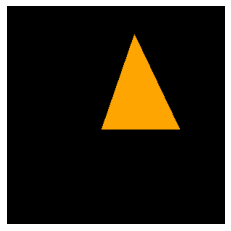

In [16]:
plt.imshow(img)
plt.axis('off');

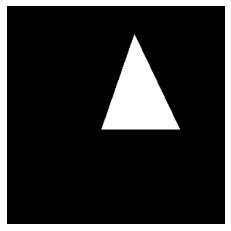

In [17]:
plt.imshow(mask)
plt.axis('off');

### Create dataset

In [2]:
backgrounds_folder = Path('/home/e_radionova/Datasets/SimpleShapes_10_classes/backgrounds_300x400')
background_names = np.sort(os.listdir(backgrounds_folder)).tolist()

In [2]:
dict_colors = {'green': (1,128,1), 
               'black': (1, 1, 1), 
               'blue': (1,1,255), 
               'brown': (139,69,19), 
               'yellow': (255,255,1), 
               'deeppink': (255,20,147), 
               'orange': (255,165,1), 
               'purple': (138,43,226), 
               'white': (254,254,254),
               'pink': (255,192,203)
              }

In [4]:
color_count = {key:[] for key in dict_colors.keys()}
for color in dict_colors.keys():
    for back_name in background_names:
        if color in back_name:
            color_count[color].append(back_name.split('.')[0])
        else:
            if 'multi' in back_name:
                color_count['deeppink'].append(back_name.split('.')[0])
color_count['deeppink'] = list(np.unique(color_count['deeppink']))
color_count

{'green': ['green_0', 'green_1', 'green_2', 'green_3', 'green_4'],
 'black': ['black_0', 'black_1', 'black_2', 'black_3'],
 'blue': ['blue_0', 'blue_1', 'blue_2', 'blue_3', 'blue_4', 'blue_5'],
 'brown': ['brown_0', 'brown_1', 'brown_2', 'brown_3', 'brown_4'],
 'yellow': ['yellow_0', 'yellow_1', 'yellow_2', 'yellow_3', 'yellow_4'],
 'deeppink': ['multi_0', 'multi_1', 'multi_2', 'multi_4', 'multi_5'],
 'orange': ['orange_0', 'orange_1'],
 'purple': ['purple_0', 'purple_1', 'purple_2', 'purple_3', 'purple_4'],
 'white': ['white_0', 'white_1', 'white_2', 'white_3', 'white_4'],
 'pink': ['pink_0', 'pink_1', 'pink_2', 'pink_3', 'pink_4', 'pink_5']}

In [5]:
imgs_folder = Path('./raw_data/images')
imgs_folder.mkdir(parents=True, exist_ok=True)

masks_foled = Path('./raw_data/masks')
masks_foled.mkdir(parents=True, exist_ok=True)

In [6]:
dataset_folder = Path('./dataset/images/')
dataset_folder.mkdir(parents=True, exist_ok=True)

In [8]:
NUM_PER_CLASS =10  # 48 backgrounds and 10 shapes
WIDTH = 300
HEIGHT = 400

In [40]:
for color in dict_colors.keys():
    lst_backs = color_count[color]
    for name_back_color in lst_backs:
        for idx in range(NUM_PER_CLASS):
            for key_shape in figures_dct.keys():
                img, mask = figures_dct[key_shape](WIDTH, HEIGHT, color)
                np.save(f'{imgs_folder}/{name_back_color}_{key_shape}_{idx}.npy', img)
#                 cv2.imwrite(f'{imgs_folder}/{name_back_color}_{key_shape}_{idx}.jpg', img)
                cv2.imwrite(f'{masks_foled}/{name_back_color}_{key_shape}_{idx}.png', mask)

In [41]:
def connect_imgs(path_background, path_front_img):
    background = cv2.imread(path_background)
    front_img = np.load(path_front_img)
    front_img = cv2.cvtColor(front_img, cv2.COLOR_BGR2RGB)
    name_img = Path(path_front_img).stem
    print(name_img)
    img_common = np.zeros_like(background)
    for i in range(front_img.shape[0]):
        for j in range(front_img.shape[1]):
            for ch in range(front_img.shape[2]):
                if front_img[i][j][ch] != 0:
                    img_common[i][j][ch] = front_img[i][j][ch]
                else:
                    img_common[i][j][ch] = background[i][j][ch]
    cv2.imwrite(f'./dataset/images/{name_img}.jpg', img_common)

In [42]:
for color in dict_colors.keys():
    for color_name in color_count[color]:  
        pathes_color = []
        for figure in figures_dct.keys():
            for j in range(NUM_PER_CLASS):
                pathes_color.append(str(imgs_folder) + f'/{color_name}_{figure}_{j}.npy')
                
        for path in pathes_color:
            connect_imgs(f'{str(backgrounds_folder)}/{color_name}.jpg', path)

green_0_triangle_0
green_0_triangle_1
green_0_triangle_2
green_0_triangle_3
green_0_triangle_4
green_0_rectangle_0
green_0_rectangle_1
green_0_rectangle_2
green_0_rectangle_3
green_0_rectangle_4
green_2_triangle_2
green_2_triangle_3
green_2_triangle_4
green_2_rectangle_0
green_2_rectangle_1
green_2_rectangle_2
green_2_rectangle_3
green_2_rectangle_4
green_2_circle_0
green_2_circle_1
green_2_circle_2
green_2_circle_3
green_2_circle_4
green_2_hexagon_0
green_2_hexagon_1
green_2_hexagon_2
green_2_hexagon_3
green_2_hexagon_4
green_2_trapezoid_0
green_2_trapezoid_1
green_2_trapezoid_2
green_2_trapezoid_3
green_2_trapezoid_4
green_2_star_0
green_2_star_1
green_2_star_2
green_2_star_3
green_2_star_4
green_2_cross_0
green_2_cross_1
green_2_cross_2
green_2_cross_3
green_2_cross_4
green_2_moon_0
green_2_moon_1
green_2_moon_2
green_2_moon_3
green_2_moon_4
green_2_cloud_0
green_2_cloud_1
green_2_cloud_2
green_2_cloud_3
green_2_cloud_4
green_3_triangle_0
green_3_triangle_1
green_3_triangle_2
green_

blue_3_trapezoid_2
blue_3_trapezoid_3
blue_3_trapezoid_4
blue_3_star_0
blue_3_star_1
blue_3_star_2
blue_3_star_3
blue_3_star_4
blue_3_cross_0
blue_3_cross_1
blue_3_cross_2
blue_3_cross_3
blue_3_cross_4
blue_3_moon_0
blue_3_moon_1
blue_3_moon_2
blue_3_moon_3
blue_3_moon_4
blue_3_cloud_0
blue_3_cloud_1
blue_3_cloud_2
blue_3_cloud_3
blue_3_cloud_4
blue_4_triangle_0
blue_4_triangle_1
blue_4_triangle_2
blue_4_triangle_3
blue_4_triangle_4
blue_4_rectangle_0
blue_4_rectangle_1
blue_4_rectangle_2
blue_4_rectangle_3
blue_4_rectangle_4
blue_4_circle_0
blue_4_circle_1
blue_4_circle_2
blue_4_circle_3
blue_4_circle_4
blue_4_hexagon_0
blue_4_hexagon_1
blue_4_hexagon_2
blue_4_hexagon_3
blue_4_hexagon_4
blue_4_trapezoid_0
blue_4_trapezoid_1
blue_4_trapezoid_2
blue_4_trapezoid_3
blue_4_trapezoid_4
blue_4_star_0
blue_4_star_1
blue_4_star_2
blue_4_star_3
blue_4_star_4
blue_4_cross_0
blue_4_cross_1
blue_4_cross_2
blue_4_cross_3
blue_4_cross_4
blue_4_moon_0
blue_4_moon_1
blue_4_moon_2
blue_4_moon_3
blue_4_

yellow_3_triangle_1
yellow_3_triangle_2
yellow_3_triangle_3
yellow_3_triangle_4
yellow_3_rectangle_0
yellow_3_rectangle_1
yellow_3_rectangle_2
yellow_3_rectangle_3
yellow_3_rectangle_4
yellow_3_circle_0
yellow_3_circle_1
yellow_3_circle_2
yellow_3_circle_3
yellow_3_circle_4
yellow_3_hexagon_0
yellow_3_hexagon_1
yellow_3_hexagon_2
yellow_3_hexagon_3
yellow_3_hexagon_4
yellow_3_trapezoid_0
yellow_3_trapezoid_1
yellow_3_trapezoid_2
yellow_3_trapezoid_3
yellow_3_trapezoid_4
yellow_3_star_0
yellow_3_star_1
yellow_3_star_2
yellow_3_star_3
yellow_3_star_4
yellow_3_cross_0
yellow_3_cross_1
yellow_3_cross_2
yellow_3_cross_3
yellow_3_cross_4
yellow_3_moon_0
yellow_3_moon_1
yellow_3_moon_2
yellow_3_moon_3
yellow_3_moon_4
yellow_3_cloud_0
yellow_3_cloud_1
yellow_3_cloud_2
yellow_3_cloud_3
yellow_3_cloud_4
yellow_4_triangle_0
yellow_4_triangle_1
yellow_4_triangle_2
yellow_4_triangle_3
yellow_4_triangle_4
yellow_4_rectangle_0
yellow_4_rectangle_1
yellow_4_rectangle_2
yellow_4_rectangle_3
yellow_4_re

purple_1_circle_0
purple_1_circle_1
purple_1_circle_2
purple_1_circle_3
purple_1_circle_4
purple_1_hexagon_0
purple_1_hexagon_1
purple_1_hexagon_2
purple_1_hexagon_3
purple_1_hexagon_4
purple_1_trapezoid_0
purple_1_trapezoid_1
purple_1_trapezoid_2
purple_1_trapezoid_3
purple_1_trapezoid_4
purple_1_star_0
purple_1_star_1
purple_1_star_2
purple_1_star_3
purple_1_star_4
purple_1_cross_0
purple_1_cross_1
purple_1_cross_2
purple_1_cross_3
purple_1_cross_4
purple_1_moon_0
purple_1_moon_1
purple_1_moon_2
purple_1_moon_3
purple_1_moon_4
purple_1_cloud_0
purple_1_cloud_1
purple_1_cloud_2
purple_1_cloud_3
purple_1_cloud_4
purple_2_triangle_0
purple_2_triangle_1
purple_2_triangle_2
purple_2_triangle_3
purple_2_triangle_4
purple_2_rectangle_0
purple_2_rectangle_1
purple_2_rectangle_2
purple_2_rectangle_3
purple_2_rectangle_4
purple_2_circle_0
purple_2_circle_1
purple_2_circle_2
purple_2_circle_3
purple_2_circle_4
purple_2_hexagon_0
purple_2_hexagon_1
purple_2_hexagon_2
purple_2_hexagon_3
purple_2_

pink_1_star_2
pink_1_star_3
pink_1_star_4
pink_1_cross_0
pink_1_cross_1
pink_1_cross_2
pink_1_cross_3
pink_1_cross_4
pink_1_moon_0
pink_1_moon_1
pink_1_moon_2
pink_1_moon_3
pink_1_moon_4
pink_1_cloud_0
pink_1_cloud_1
pink_1_cloud_2
pink_1_cloud_3
pink_1_cloud_4
pink_2_triangle_0
pink_2_triangle_1
pink_2_triangle_2
pink_2_triangle_3
pink_2_triangle_4
pink_2_rectangle_0
pink_2_rectangle_1
pink_2_rectangle_2
pink_2_rectangle_3
pink_2_rectangle_4
pink_2_circle_0
pink_2_circle_1
pink_2_circle_2
pink_2_circle_3
pink_2_circle_4
pink_2_hexagon_0
pink_2_hexagon_1
pink_2_hexagon_2
pink_2_hexagon_3
pink_2_hexagon_4
pink_2_trapezoid_0
pink_2_trapezoid_1
pink_2_trapezoid_2
pink_2_trapezoid_3
pink_2_trapezoid_4
pink_2_star_0
pink_2_star_1
pink_2_star_2
pink_2_star_3
pink_2_star_4
pink_2_cross_0
pink_2_cross_1
pink_2_cross_2
pink_2_cross_3
pink_2_cross_4
pink_2_moon_0
pink_2_moon_1
pink_2_moon_2
pink_2_moon_3
pink_2_moon_4
pink_2_cloud_0
pink_2_cloud_1
pink_2_cloud_2
pink_2_cloud_3
pink_2_cloud_4
pin

### Copy masks to dataset folder

In [52]:
dataset_masks = Path('./dataset/masks/')
dataset_masks.mkdir(parents=True, exist_ok=True)

In [54]:
mask_files = sorted(os.listdir(masks_foled))
for file in mask_files: 
    shutil.copyfile(masks_foled / file, dataset_masks / file)